$$\Huge \text{RAPORT}$$
$$\huge \text{LISTA 2}$$
$$\large \text{Autorzy: Katarzyna Rudzińska, Jagoda Płócienniczak}$$

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, fisher_exact

In [ ]:
# np.set_printoptions(legacy='1.25')

In [15]:
data = pd.read_csv('ankieta.csv', encoding='Windows-1250', sep=';')
data['DZIAŁ'] = data['DZIAŁ'].astype("category")
data['CZY_KIER'] = data['CZY_KIER'].astype("category")
data['PŁEĆ'] = data['PŁEĆ'].astype("category")

In [16]:
def categorize_age(age):
    if age <= 35:
        return "<=35"
    elif 36 <= age <= 45:
        return "36-45"
    elif 46 <= age <= 55:
        return "46-55"
    else:
        return ">55"

data["WIEK_KAT"] = data["WIEK"].apply(categorize_age)
data['WIEK_KAT'] = data['WIEK_KAT'].astype("category")

In [17]:
def is_satisfied(satisfaction_lvl):
    if satisfaction_lvl == -2 or satisfaction_lvl == -1:
        return 'NIE'
    else:
        return 'TAK'

data["CZY_ZADOW"] = data["PYT_2"].apply(is_satisfied)
data["CZY_ZADOW"] = data["CZY_ZADOW"].astype("category")

## CZĘŚĆ I

### ZADANIE 1
    W ankiecie przedstawionej na poprzedniej liście pracownicy zostali poproszeni o wyrażenie opinii na temat skuteczności szkolenia "Efektywna komunikacja w zespole" zorganizowanego przez firmę. Wśród próbki 200 pracowników (losowanie proste ze zwracaniem) uzyskano wyniki:
        • 14 pracowników - bardzo niezadowolonych,
        • 17 pracowników - niezadowolonych,
        • 40 pracowników - nie ma zdania,
        • 100 pracowników - zadowolonych,
        • 29 pracowników - bardzo zadowolonych,
    Na podstawie danych wyznacz przedział ufności dla wektora prawodobieństw opisującego stopień zadowolenia ze szkolenia. Przyjmij poziom ufności 0,95.

### ZADANIE 2 
    Napisz funkcję, która wyznacza wartość poziomu krytycznego w następujących testach:
        • chi-kwadrat Pearsona
        • chi-kwadrat największej wiarogodności
    służących do weryfikacji hipotezy H0 : p = p0 przy hipotezie alternatywnej H1 : p = p0 na podstawie obserwacji x wektora losowego X z rozkładu wielomianowego z parametrami n i p.

### ZADANIE 3
    Na podstawie danych z ankiety z poprzedniej listy zweryfikuj hipotezę, że w grupie pracowników zatrudnionwych w Dziale Produktowym rozkład odpowiedzi na pytanie "Jak bardzo zgadzasz się ze stwierdzeniem, że firma zapewnia odpowiednie wsparcie i materiały umożliwiające skuteczne wykorzystanie w praktyce wiedzy zdobytej w trakcie szkoleń?" jest równomierny, tzn. jest jednakowe prawdopodobieństwo, że pracownik zatrudniony w Dziale Produkcjnym udzielił odpowiedzi "zdecydowanie się nie zgadzam", "nie zgadzam się", "nie mam zdania", "zgadzam się", "zdecydowanie się zgadzam" na pytanie PYT_1. Przyjmij poziom istotności 0,05. Skorzystaj z funkcji napisanej w zadaniu 2.

## CZĘŚĆ II

### ZADANIE 4
    Zapoznaj się z funkcjami służącymi do wykonania testu Fishera oraz testu Freemana-Haltona.

### ZADANIE 5
    Korzystajac z testu Fishera, na poziomie istotnosci 0.05, zweryfikuj hipotezę, że zmienna 'PŁEć' i zmienna 'CZY_KIER' są niezależne. Czy na poziomie istotności 0.05 możemy wnioskować, że prawdopodobieństwo tego, że na stanowisku kierowniczym pracuje kobieta jest równe prawdopodobieństwu tego, że na stanowisku kierowniczym pracuje mężczyzna? Uzasadnij odpowiedź.

### ZDANIE 6
    Korzystajac z testu Freemana-Haltona na poziomie istotności 0,05 zweryfikuj następujące hipotezy:
        a) zajmowanie stanowiska kierowniczego nie zależy od wieku (CZY_KIER oraz WIEK_KAT),
        b) zajmowanie stanowiska kierowniczego nie zależy od stażu pracy (CZY_KIER oraz STAŻ),
        c) stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie nie zależy od zajmowanego stanowiska (PYT_2 oraz CZY_KIER),
        d) stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie nie zależy od stażu (PYT_2 oraz STAŻ),
        e) stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie nie zależy od płci (PYT_2 oraz PŁEĆ),
        f) stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie nie zależy od wieku (PYT_2 oraz WIEK_KAT).
    Wykonaj podpunkty c), d), e) oraz d) zastępujęc zmienną PYT_2 przez zmienną CZY_ZADOW zdefiniowaną w zadaniu 1. w części I z poprzedniej listy. Porównaj wyniki.

## CZĘŚĆ III

### ZADANIE 7
    Zapoznaj się z funkcją służącą do wykonania testu niezależności chi-kwadrat.

Do przeprowadzenia testu niezależności chi-kwadrat wykorzystano wbudowaną funkcję *chi2_contingency* z biblioteki *scipy.stats*. Funkcja ta oblicza wartość statystyki chi-kwadrat oraz odpowiadającą jej p-wartość, zakładając hipotezę zerową o statystycznej niezależności zmiennych reprezentowanych w tabeli kontyngencji (tabeli krzyżowej). Funkcja zwraca również oczekiwane liczebności, które są wyznaczane na podstawie iloczynów sum marginalnych, zgodnie z założeniem niezależności zmiennych.

Sformułowanie hipotez statystycznych w teście chi-kwadrat:

$H_0$ : Zmienne są statystycznie niezależne

$H_1$ : Zmienne są statystycznie zależne

In [18]:
obs_freq = np.array([[10, 10, 20], [20, 20, 20]])
res = chi2_contingency(obs_freq)

# print('Statystyka: ', res.statistic)
# print('p-wartość: ', res.pvalue)
# print('Stopnie swobody: ', res.dof)
# print('Oczekiwane częstotliwości/liczebności: ', res.expected_freq)

res

Chi2ContingencyResult(statistic=np.float64(2.7777777777777777), pvalue=np.float64(0.2493522087772962), dof=2, expected_freq=array([[12., 12., 16.],
       [18., 18., 24.]]))

### ZADANIE 8
    Korzystając z funkcji poznanej w zadaniu 7. zweryfikuj hipotezę, że stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie nie zależy od zajmowanego stanowiska. Przyjmij poziom istotności 0.01. Wynik testu porównaj z wynikiem uzyskanym w zadaniu 6. Zaprezentuj reszty wyznaczane w teście na wykresie asocjacyjnym i dokonaj jego interpretacji.

In [19]:
crosstab_P2CzK = pd.crosstab(data['PYT_2'], data['CZY_KIER'])
chi2_P2CzK = chi2_contingency(crosstab_P2CzK.values)

In [20]:
print('p-wartość: ', chi2_P2CzK.pvalue)

p-wartość:  0.0043970813557677796


W tym przypadku przyjęto poziom istotności $\alpha = 0.01$. Porównując go z otrzymaną p-wartością:
$$ \text{p-wartość} = 0.004 < \alpha = 0.01$$
W związku z tym istnieją podstawy do odrzucenia hipotezy zerowej. Można zatem stwierdzić, że stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie istotnie zależy od zajmowanego stanowiska.

In [21]:
chi2_P2CzK_stand_res = (crosstab_P2CzK.values - chi2_P2CzK.expected_freq) / np.sqrt(chi2_P2CzK.expected_freq)
chi2_P2CzK_stand_res

array([[-1.24990236e-03,  3.16385999e-03],
       [ 1.68296463e-01, -4.26006434e-01],
       [-1.31529464e+00,  3.32938655e+00],
       [ 1.09649995e-01, -2.77555467e-01]])

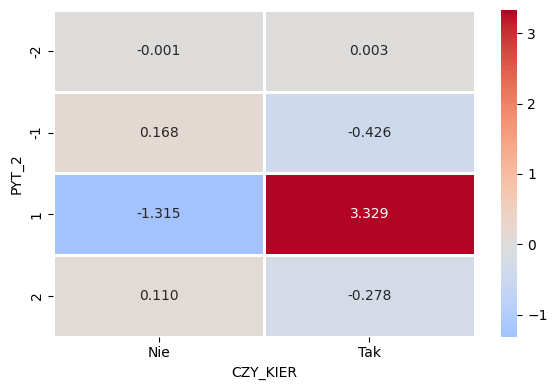

In [22]:
plt.figure(figsize=(6, 4))

sns.heatmap(
    chi2_P2CzK_stand_res,
    center=-0.05,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    cbar=True,
    xticklabels=crosstab_P2CzK.columns,
    yticklabels=crosstab_P2CzK.index,
    linewidths=1
)

plt.ylabel('PYT_2')
plt.xlabel('CZY_KIER')
plt.tight_layout()
plt.show()

### ZADANIE 9
    Zapoznaj się z funkcję służącą do generowania realizacji wektorów losowych z rozkładu wielomianowego, a następnie korzystając z niej przeprowadź symulacje w celu oszacowania mocy testu Fishera oraz mocy testu chi-kwadrat Pearsona, generując dane z tabeli 2×2, w której p11 = 1/40, p12 = 3/40, p21 = 19/40,    p22 = 17/40. Symulacje wykonaj dla n = 50, n = 100 oraz n = 1000. Sformułuj wnioski.

In [23]:
p = [1/40, 3/40, 19/40, 17/40]
alpha = 0.05
tab_size = (2,2)
n = [50, 100, 1000]

$\huge \text{tutaj zweryfikować - dla domyślnej lambda\_ (Pearson) chi2 nie działa}$

In [24]:
def test_power(p, alpha, tab_size, n, M=500):
    chi2_rejected = 0
    fisher_rejected = 0
    for i in range(M):
        random_vector = np.random.multinomial(n, p)
        random_vector = random_vector.reshape(tab_size)

        chi2_results = chi2_contingency(random_vector, lambda_="log-likelihood")
        fisher_results = fisher_exact(random_vector)

        if chi2_results.pvalue < alpha:
            chi2_rejected += 1
        if fisher_results.pvalue < alpha:
            fisher_rejected += 1   
                     
    power_chi2 = chi2_rejected / M
    power_fisher = fisher_rejected / M

    return power_chi2, power_fisher

In [25]:
chi2_power = np.zeros(len(n))
fisher_power = np.zeros(len(n))

for i, n_i in enumerate(n):
    chi2_power[i], fisher_power[i] = test_power(p, alpha, tab_size, n_i)

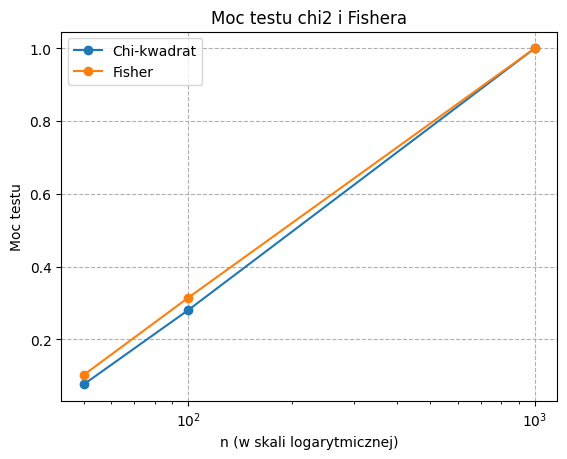

In [26]:
plt.plot(n, chi2_power, label='Chi-kwadrat', marker='o')
plt.plot(n, fisher_power, label='Fisher', marker='o')

plt.legend()
plt.title('Moc testu chi2 i Fishera')
plt.grid(True, linestyle='--')
plt.xscale('log')
plt.xlabel('n (w skali logarytmicznej)')
plt.ylabel('Moc testu')
plt.show()

In [27]:
# def test_power(p, alpha, tab_size, n, test_func, M=500):
#     rejected_count = 0
#     valid_runs = 0

#     for _ in range(M):
#         random_vector = np.random.multinomial(n, p)
#         random_vector = random_vector.reshape(tab_size)

#         try:
#             result = test_func(random_vector)
#             p_value = result.pvalue if hasattr(result, 'pvalue') else result[1]

#             if p_value < alpha:
#                 rejected_count += 1
#             valid_runs += 1

#         except ValueError:
#             continue

#     if valid_runs == 0:
#         return np.nan 

#     return rejected_count / valid_runs


### ZADANIE 10
    Napisz funkcję, która dla danych z tablicy dwudzielczej oblicza wartość poziomu krytycznego w teście niezależnosci opartym na ilorazie wiarogodnosci. Korzystając z napisanej funkcji, wykonaj test dla danych przeanalizowanych w zadaniu 8.

$\huge \text{tutaj zweryfikować}$

In [28]:
# G-test: Funkcja scipy.stats.chi2_contingency z parametrem lambda_="log-likelihood" wykonuje test niezależności oparty na ilorazie wiarygodności (czyli tzw. G-test)

def likelihood_ratio_test_g(obs):
    stat, p, dof, _ = chi2_contingency(obs, lambda_="log-likelihood")
    return stat, p, dof

In [29]:
# Przykład użycia dla zadania 8
stat, p, dof = likelihood_ratio_test_g(crosstab_P2CzK.values)

print(f"Statystyka G²: {stat:.4f}, p-value: {p:.4f}, stopnie swobody: {dof}")

Statystyka G²: 8.3285, p-value: 0.0397, stopnie swobody: 3


## CZĘŚĆ IV i V

### ZADANIE 11
    Przeprowadzone wsród brytyjskich mężczyzn badanie trwające 20 lat wykazało, że odsetek zmarłych (na rok) z powodu raka płuc wynosił 0,00140 wsród osób palących papierosy i 0,00010 wsród osób niepalących. Odsetek zmarłych z powodu choroby niedokrwiennej serca wynosił 0,00669 dla palaczy i 0,00413 dla osób niepalących. Opisz związek pomiędzy paleniem papierosów a śmiercią z powodu raka płuc oraz związek pomiędzy paleniem papierosów a śmiercią z powodu choroby serca. Skorzystaj z różnicy proporcji, ryzyka względnego i ilorazu szans. Zinterpretuj wartości. Związek której pary zmiennych jest silniejszy?

Skorzystamy z następujących definicji:

- ryzyko względne:

$$
RR = \dfrac{IE/(IE + IN)}{CE/(CE + CN)}
$$

gdzie: 

$RR$ - ryzyko względne, 	

$IE$ - wystąpienie zdarzenia interwencji, 

$IN$ - brak wystąpienia zdarzenia interwencji, 

$CE$ - wystąpienie zdarzenia w grupie kontrolnej, 

$CN$ - brak wystąpienia zdarzenia w grupie kontrolnej.

- iloraz szans (ang. OR, odds ratio) - stosunek szansy wystąpienia danego zdarzenia w jednej grupie do szansy jego wystąpienia w innej grupie

$$
OR_{A/B} = \dfrac{\mathbb {P}(A)\cdot(1-\mathbb {P}(B))}{\mathbb {P}(B)\cdot(1-\mathbb {P}(A))}
$$

gdzie: $\mathbb {P}(A)$ to prawdopodobieństwo wystąpienia zdarzenia w grupie $A$.

Jeżeli OR<1 oznacza to, że w badanej grupie (w porównaniu do grupy odniesienia) istnieje mniejsza szansa wystąpienia zdarzenia. Jeżeli OR>1 oznacza to, że w badanej grupie (w porównaniu do grupy odniesienia) istnieje większa szansa wystąpienia danego zdarzenia.

In [44]:
# Odsetek zmarłych z powodu raka płuc wśród palaczy i niepalaczy
lung_cancer_rate_smokers = 0.00140
lung_cancer_rate_nonsmokers  = 0.00010
lung_cancer_rate_diff = lung_cancer_rate_smokers - lung_cancer_rate_nonsmokers
lung_cancer_RR = lung_cancer_rate_smokers / lung_cancer_rate_nonsmokers
lung_cancer_OR = (lung_cancer_rate_smokers / (1 - lung_cancer_rate_smokers)) / (lung_cancer_rate_nonsmokers / (1 - lung_cancer_rate_nonsmokers))

# Odsetek zmarłych z powodu choroby niedokrwiennej serca wśród palaczy i niepalaczy
heart_disease_rate_smokers = 0.00669
heart_disease_rate_nonsmokers = 0.00413
heart_disease_rate_diff = heart_disease_rate_smokers - heart_disease_rate_nonsmokers
heart_disease_RR = heart_disease_rate_smokers / heart_disease_rate_nonsmokers
heart_disease_OR = (heart_disease_rate_smokers / (1 - heart_disease_rate_smokers)) / (heart_disease_rate_nonsmokers / (1 - heart_disease_rate_nonsmokers))

In [45]:
data_british_man = {
    "Choroba": ["Rak płuc", "Choroba niedokrwienna serca"],
    "Odsetek zmarłych (palacze)": [lung_cancer_rate_smokers, heart_disease_rate_smokers],
    "Odsetek zmarłych (niepalacze)": [lung_cancer_rate_nonsmokers, heart_disease_rate_nonsmokers],
    "Różnica proporcji": [lung_cancer_rate_diff, heart_disease_rate_diff],
    "Ryzyko względne (RR)": [lung_cancer_RR, heart_disease_RR],
    "Iloraz szans (OR)": [lung_cancer_OR, heart_disease_OR]
}

df = pd.DataFrame(data_british_man)
df["Odsetek zmarłych (palacze)"] = df["Odsetek zmarłych (palacze)"].apply(lambda x: f"{x:.5f}")
df["Odsetek zmarłych (niepalacze)"] = df["Odsetek zmarłych (niepalacze)"].apply(lambda x: f"{x:.5f}")
df["Różnica proporcji"] = df["Różnica proporcji"].apply(lambda x: f"{x:.5f}")
df["Ryzyko względne (RR)"] = df["Ryzyko względne (RR)"].apply(lambda x: f"{x:.2f}")
df["Iloraz szans (OR)"] = df["Iloraz szans (OR)"].apply(lambda x: f"{x:.2f}")

df

,Choroba,Odsetek zmarłych (palacze),Odsetek zmarłych (niepalacze),Różnica proporcji,Ryzyko względne (RR),Iloraz szans (OR)
0,Rak płuc,0.00140,0.00010,0.00130,14.00,14.02
1,Choroba niedokrwienna serca,0.00669,0.00413,0.00256,1.62,1.62


### ZADANIE 12
    Tabela 1 przedstawia wyniki dotyczące śmiertelności kierowców i pasażerów w wypadkach samochodowych na Florydzie w 2008 roku, w zależności od tego, czy osoba miała zapięty pas bezpieczeństwa czy nie.

<div align="center">

| | Śmiertelny | Nieśmiertelny |
| ----------- | ----------- | ----------- |
| **Bez pasów** | 1085 | 55 623 |
| **Z pasami** | 703 | 441 239 |

</div> 
<br>
<div align="center">
Table 1: Wyniki dotyczące śmiertelności w wypadkach samochodowych na Florydzie w 2008 roku.
</div>

        a) Oszacuj warunkowe prawdopodobieństwo śmierci w wypadku ze względu na drugą zmienną, tj. dla kierowców i pasażerów, którzy użyli pasa bezpieczeństwa oraz dla kierowców i pasażerów, który nie użyli pasa bezpieczeństwa.
        b) Oszacuj warunkowe prawdopodobieństwo użycia pasa bezpieczeństwa ze względu na drugą zmienną, tj. dla kierowców i pasażerów ze śmiertelnymi obrażeniami oraz dla kierowców i pasażerów, którzy przeżyli wypadek.
        c) Jaki jest najbardziej naturalny wybór dla zmiennej objaśnianej w tym badaniu? Dla takiego wyboru wyznacz i zinterpretuj różnice proporcji, ryzyko względne oraz iloraz szans. Dlaczego wartości ryzyka względnego i ilorazu szans przyjmują zbliżone wartości?

### ZADANIE 13
    Oblicz wartości odpowiednich miar współzmienności (współczynnik tau lub współczynnik gamma) dla zmiennych:
        • stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie i zajmowane stanowisko,
        • stopień zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie i staż pracy,
        • zajmowane stanowisko i staż pracy.

### ZADANIE 14
    Na podstawie informacji przedstawionych na wykładzie napisz własną funkcję do przeprowadzania analizy korespondencji. Funkcja powinna przyjmować jako argument tablicę dwudzielczą i zwracać obliczone wartości odpowiednich wektorów i macierzy, współrzędnych punktów oraz odpowiedni wykres. Korzystając z napisanej funkcji wykonaj analizę korespondencji dla danych dotyczących stopnia zadowolenia ze szkoleń w kontekście dopasowania do indywidualnych potrzeb w pierwszym badanym okresie oraz stażu pracy.

-------------------------------------------------------

## ZADANIA DODATKOWE

### ZADANIE *1
    Napisz funkcję, która dla dwóch wektorów danych oblicza wartość poziomu krytycznego (p-value) w teście opartym na korelacji odległości. Następnie dla wygenerowanych danych zweryfikuj hipotezę o niezależności przy użyciu napisanej funkcji.

### ZADANIE *2
    Dla zadanych π1 oraz π2 pokaż, że wartość ryzyka względnego (RR) nie jest bardziej oddalona od wartości 1 (wartość odpowiadająca niezależności) niż wartość odpowiadającego ilorazu szans (OR).

### ZADANIE *3
    Niech D oznacza posiadanie pewnej choroby, a E pozostawanie wystawionym na pewny czynnik ryzyka. W badaniach epidemiologicznych definuje się miarę AR nazywaną ryzykiem przypisanym (ang. attributable risk).
        a) Niech P(E′) = 1−P(E), wówczas AR = [P(D)−P(D|E′)]/P(D). Wyjaśnij interpretację miary na podstawie wzoru.
        b) Pokaż, że AR ma związek z ryzykiem względnym, tzn.:
                AR=[P(E)(RR−1)]/[1+P(E)(RR−1)]